In [1]:
# meas_Omega: Werte von Omega [rad/s], für die die Amplitude gemessen wurde
meas_Omega = (0.75, 1.80, 2.49, 2.80, 2.91, 2.91, 3.14, 3.45, 3.57, 3.93, 3.93, 4.91)
# S_Omega: geschätzter Fehler der Omega-Werte [rad/s]
S_Omega =     0.3
# meas_A: gemessene Amplitude [] bei den Werten "meas_Omega"
meas_A =     (0.32, 0.48, 0.80, 1.30, 2.10, 1.75, 4.00, 1.20, 1.00, 0.55, 1.30, 0.70)
# S_A: geschätzter Fehler der Amplituden-Werte []
S_A =         0.1
# Startwerte für die Parameterschätzung. Bei offensichtlich falschem Fit anpassen!
M_0_div_J =   3
omega_0 =     3
alpha =       0.1

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


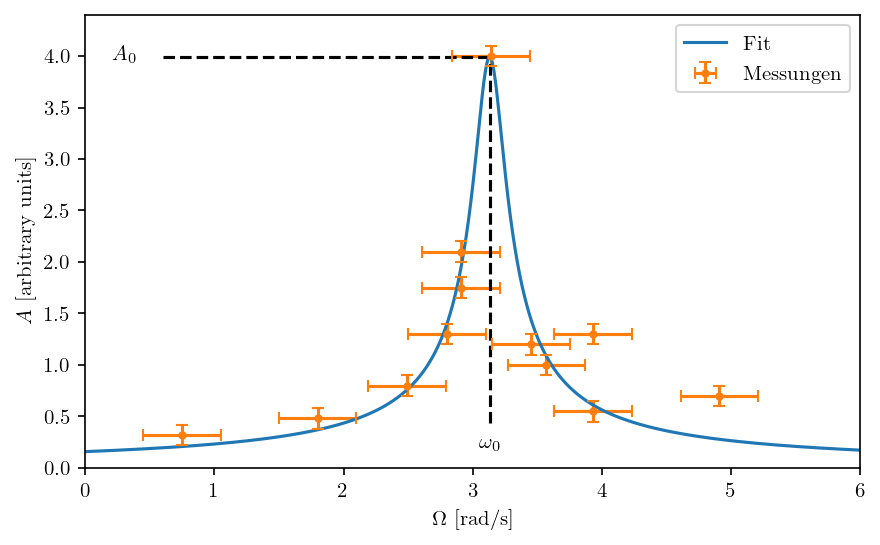

M_0 / J =    3.09766 arbitrary units

A_0     = M_0 / (2 J omega_0 alpha)
        =    3.98885 arbitrary units

omega_0 =    3.13146 rad/s
alpha   =    0.12400 rad/s


In [2]:
from scipy.optimize import curve_fit
from numpy.lib.scimath import sqrt
from numpy import linspace, floor, ceil, array, mean
import matplotlib.pyplot as plt

# Die Modellfunktion.
# Erste Variable: freie Variable.
# Alle andern Variablen: Parameter.
def A(Omega, M_0_div_J, omega_0, alpha):
    sigma = Omega - omega_0
    A = M_0_div_J / (2 * omega_0 * sqrt(sigma**2 + alpha**2))
    return A

# fitten
popt, pcov = curve_fit(A, meas_Omega, meas_A, (M_0_div_J, omega_0, alpha))

# gefittete Werte aus dem "popt"-Array extrahieren
M_0_div_J = popt[0]
omega_0 = popt[1]
alpha = popt[2]

# optimale Grenzen der x-Achse bestimmen
xrange = (floor(min(meas_Omega)), ceil(1.1*max(meas_Omega)))

# Punkte für die "Fit"-Kurve berechnen
plt_Omega = linspace(xrange[0], xrange[1], 1000)
plt_A = A(plt_Omega, M_0_div_J, omega_0, alpha)

# optimale Grenzen der y-Achse bestimmen
yrange = (0, 1.1*ceil(max(plt_A)))

plt.rcParams.update({"text.usetex": True,
                     "font.serif": "computer modern roman",
                     "font.family": "serif"})
# Grösse des Diagramms definieren
plt_pixel = array((1000, 600))
plt_dpi = 150
fig = plt.figure(figsize = plt_pixel / plt_dpi, dpi = plt_dpi)

plt.xlim(xrange)
plt.ylim(yrange)

# maximale Amplitude A_0 aus gefitteten Werten berechnen
A_0 = M_0_div_J / (2 * omega_0 * alpha)

# A_0: beschriftete gestrichelte Linie
plt.plot([(xrange[1]-xrange[0])/10+xrange[0],omega_0], A_0 * array((1, 1)), '--k')
plt.text((xrange[1]-xrange[0])/20+xrange[0], A_0, '$A_0$',
         horizontalalignment='center', verticalalignment='center')

# omega_0: beschriftete gestrichelte Linie 
plt.plot(omega_0 * array((1, 1)), [yrange[1]/10, A_0], '--k')
plt.text(omega_0, yrange[1]/20, '$\omega_0$',
         horizontalalignment='center', verticalalignment='center')

# Fit plotten
plt.plot(plt_Omega, plt_A, '-', label = 'Fit')

# Messungen plotten
plt.errorbar(x = meas_Omega, y = meas_A, xerr = S_Omega, yerr = S_A, capsize = 3, fmt = '.', label = 'Messungen')

plt.xlabel('$\Omega$ [rad/s]')
plt.ylabel('$A$ [arbitrary units]')

plt.legend()

plt.show()

# gefittete Werte ausgeben
print('M_0 / J = %10.5f arbitrary units' % M_0_div_J)
print()
print('A_0     = M_0 / (2 J omega_0 alpha)')
print('        = %10.5f arbitrary units' % A_0)
print()
print('omega_0 = %10.5f rad/s' % omega_0)
print('alpha   = %10.5f rad/s' % alpha)